# Clustering and hopkins test
   **Abhishek Gopinath k CB.EN.P2AID20002**
 

In [467]:
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [468]:
df = pd.read_csv('https://raw.githubusercontent.com/overtunned/AppliedPredicitiveAnalysis/main/Case%20study%20dataset/Mall_Customers.csv')

In [469]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [470]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [472]:
df.columns = [re.sub('[0-9)($\- ]*', '', col).lower() for col in df.columns]
df = df.drop('customerid',axis = 1)

In [473]:
final_df = pd.get_dummies(df, prefix_sep="_", drop_first=True)
final_df.columns

Index(['age', 'annualincomek', 'spendingscore', 'genre_Male'], dtype='object')

In [474]:
kmeans = KMeans(n_clusters=3).fit(final_df[['age','annualincomek']])
centroids = kmeans.cluster_centers_
print(centroids)

[[28.36       31.44      ]
 [34.34782609 82.82608696]
 [55.03448276 50.34482759]]


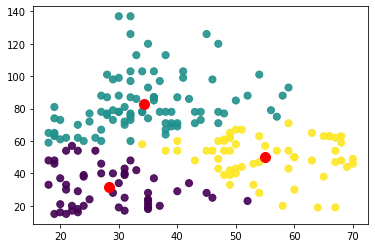

In [475]:
plt.scatter(df['age'], df['annualincomek'], c= kmeans.labels_.astype(float), s=50, alpha=0.9)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100)

Clustering into 4 classes

[[ 30.34693878  29.26530612]
 [ 31.95890411  72.95890411]
 [ 39.         106.5       ]
 [ 55.81481481  51.77777778]]


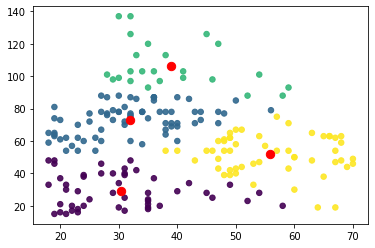

In [476]:
kmeans = KMeans(n_clusters=4).fit(final_df[['age','annualincomek']])
centroids = kmeans.cluster_centers_
print(centroids)
plt.scatter(df['age'], 
            df['annualincomek'], 
            c= kmeans.labels_.astype(float), 
            s=30,
            alpha=0.9)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=70)

# Hopkins Test checking for clustering tendency

In [452]:
from pyclustertend import hopkins
from sklearn.preprocessing import scale

In [453]:
hopkins(final_df,200)

0.30401534666575514

The hopkins test gives a value less than 0.5 hence there is tendency to cluster the data. Hence applying kmeans.

In [454]:
kmeans = KMeans(n_clusters=3).fit(final_df)
centroids = kmeans.cluster_centers_
print(centroids)

[[40.32520325 44.15447154 49.82926829  0.40650407]
 [40.39473684 87.         18.63157895  0.52631579]
 [32.69230769 86.53846154 82.12820513  0.46153846]]


In [455]:
kmeans.fit_predict(final_df)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [465]:
X = final_df.iloc[0:2]

In [466]:
kmeans.predict(X)

array([0, 0])

We have predicted for the first 2 values of data and got a class